# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

### Final Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `new_st_depression`: The presence of ST depression induced by exercise relative to rest (0 = no; 1 = yes) (Categorical)
12. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
13. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
14. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
15. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)
16. `exercise_problem`: 0 = no exercise problem; 1 = exercise problem (Categorical)

### Essential Libraries

Let us begin by importing the essential Python Libraries for our Decision Tree Modeling

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

### Import the Dataset

We will be importing our clean_data.csv dataset that we previously saved.\
Dataset is a cleaned version of [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 


In [2]:
# Importing our dataset
clean_data = pd.read_csv("datasets\clean_data2.csv")

print("Data dimensions:", clean_data.shape)

clean_data

Data dimensions: (1000, 15)


,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,new_st_depression,slope,num_affected_vessels,defect_type,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,1,140,221,0,1,164,1,0.0,0,2,0,2,1
996,60,1,0,125,258,0,0,141,1,2.8,1,1,1,3,0
997,47,1,0,110,275,0,0,118,1,1.0,1,1,1,2,0
998,50,0,0,110,254,0,0,159,0,0.0,0,2,0,2,1


In [3]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "resting_ecg_result", "exercise_induced_angina", "new_st_depression", 
           "slope", "num_affected_vessels", "defect_type", "heart_disease"]
num_var = [var for var in clean_data.columns if var not in cat_var]

### One Hot Encoding

As sklearn's DecisionTreeClassifier currently does not handle categorical variables, we shall be using sklearn's preprocessing `OneHotEncoding` to encode our categorical variables nominally.

In [4]:
from sklearn.preprocessing import OneHotEncoder

# drop = "first" parameter drops the first category in each feature
ohe = OneHotEncoder(drop = "first")

# One-Hot Encoding of categorical predictors
cat_pred = clean_data[cat_var].drop(["slope", "num_affected_vessels", "heart_disease"], axis = 1)
ohe.fit(cat_pred)

cat_pred_ohe = pd.DataFrame(ohe.transform(cat_pred).toarray(), 
             columns = ohe.get_feature_names_out(cat_pred.columns))

# Check the encoded variables
cat_pred_ohe.info()

# Concatenate with the numeric variables
clean_data_encoded = pd.concat([clean_data[num_var], cat_pred_ohe, 
                            clean_data[["slope", "num_affected_vessels", "heart_disease"]]], axis = 1)

clean_data_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex_1                      1000 non-null   float64
 1   chest_pain_1               1000 non-null   float64
 2   chest_pain_2               1000 non-null   float64
 3   chest_pain_3               1000 non-null   float64
 4   fasting_blood_sugar_1      1000 non-null   float64
 5   resting_ecg_result_1       1000 non-null   float64
 6   resting_ecg_result_2       1000 non-null   float64
 7   exercise_induced_angina_1  1000 non-null   float64
 8   new_st_depression_1        1000 non-null   float64
 9   defect_type_2              1000 non-null   float64
 10  defect_type_3              1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


,age,blood_pressure,cholesterol,max_heart_rate,st_depression,sex_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,resting_ecg_result_1,resting_ecg_result_2,exercise_induced_angina_1,new_st_depression_1,defect_type_2,defect_type_3,slope,num_affected_vessels,heart_disease
0,52,125,212,168,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2,2,0
1,53,140,203,155,3.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,0
2,70,145,174,125,2.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0,0
3,61,148,203,161,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1,0
4,62,138,294,106,1.9,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,140,221,164,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2,0,1
996,60,125,258,141,2.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1,1,0
997,47,110,275,118,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,0
998,50,110,254,159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,1


### Splitting our dataset

We will be utilising the train_test_split function to split our data into our desired 80:20 ratio 

In [7]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(clean_data_encoded['heart_disease'])
X = pd.DataFrame(clean_data_encoded.drop('heart_disease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Decision Tree Modeling

We will be using a decision tree as our initial model to test our hypothesis

[Text(0.5, 0.9, 'defect_type_2 <= 0.5\ngini = 0.5\nsamples = 800\nvalue = [396, 404]\nclass = Heart Disease'),
 Text(0.25, 0.7, 'num_affected_vessels <= 0.5\ngini = 0.344\nsamples = 363\nvalue = [283, 80]\nclass = No Heart Disease'),
 Text(0.125, 0.5, 'exercise_induced_angina_1 <= 0.5\ngini = 0.489\nsamples = 157\nvalue = [90, 67]\nclass = No Heart Disease'),
 Text(0.0625, 0.3, 'age <= 51.0\ngini = 0.45\nsamples = 85\nvalue = [29, 56]\nclass = Heart Disease'),
 Text(0.03125, 0.1, 'gini = 0.475\nsamples = 31\nvalue = [19, 12]\nclass = No Heart Disease'),
 Text(0.09375, 0.1, 'gini = 0.302\nsamples = 54\nvalue = [10, 44]\nclass = Heart Disease'),
 Text(0.1875, 0.3, 'st_depression <= 1.55\ngini = 0.259\nsamples = 72\nvalue = [61, 11]\nclass = No Heart Disease'),
 Text(0.15625, 0.1, 'gini = 0.483\nsamples = 27\nvalue = [16, 11]\nclass = No Heart Disease'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]\nclass = No Heart Disease'),
 Text(0.375, 0.5, 'blood_pressure <= 109.0\n

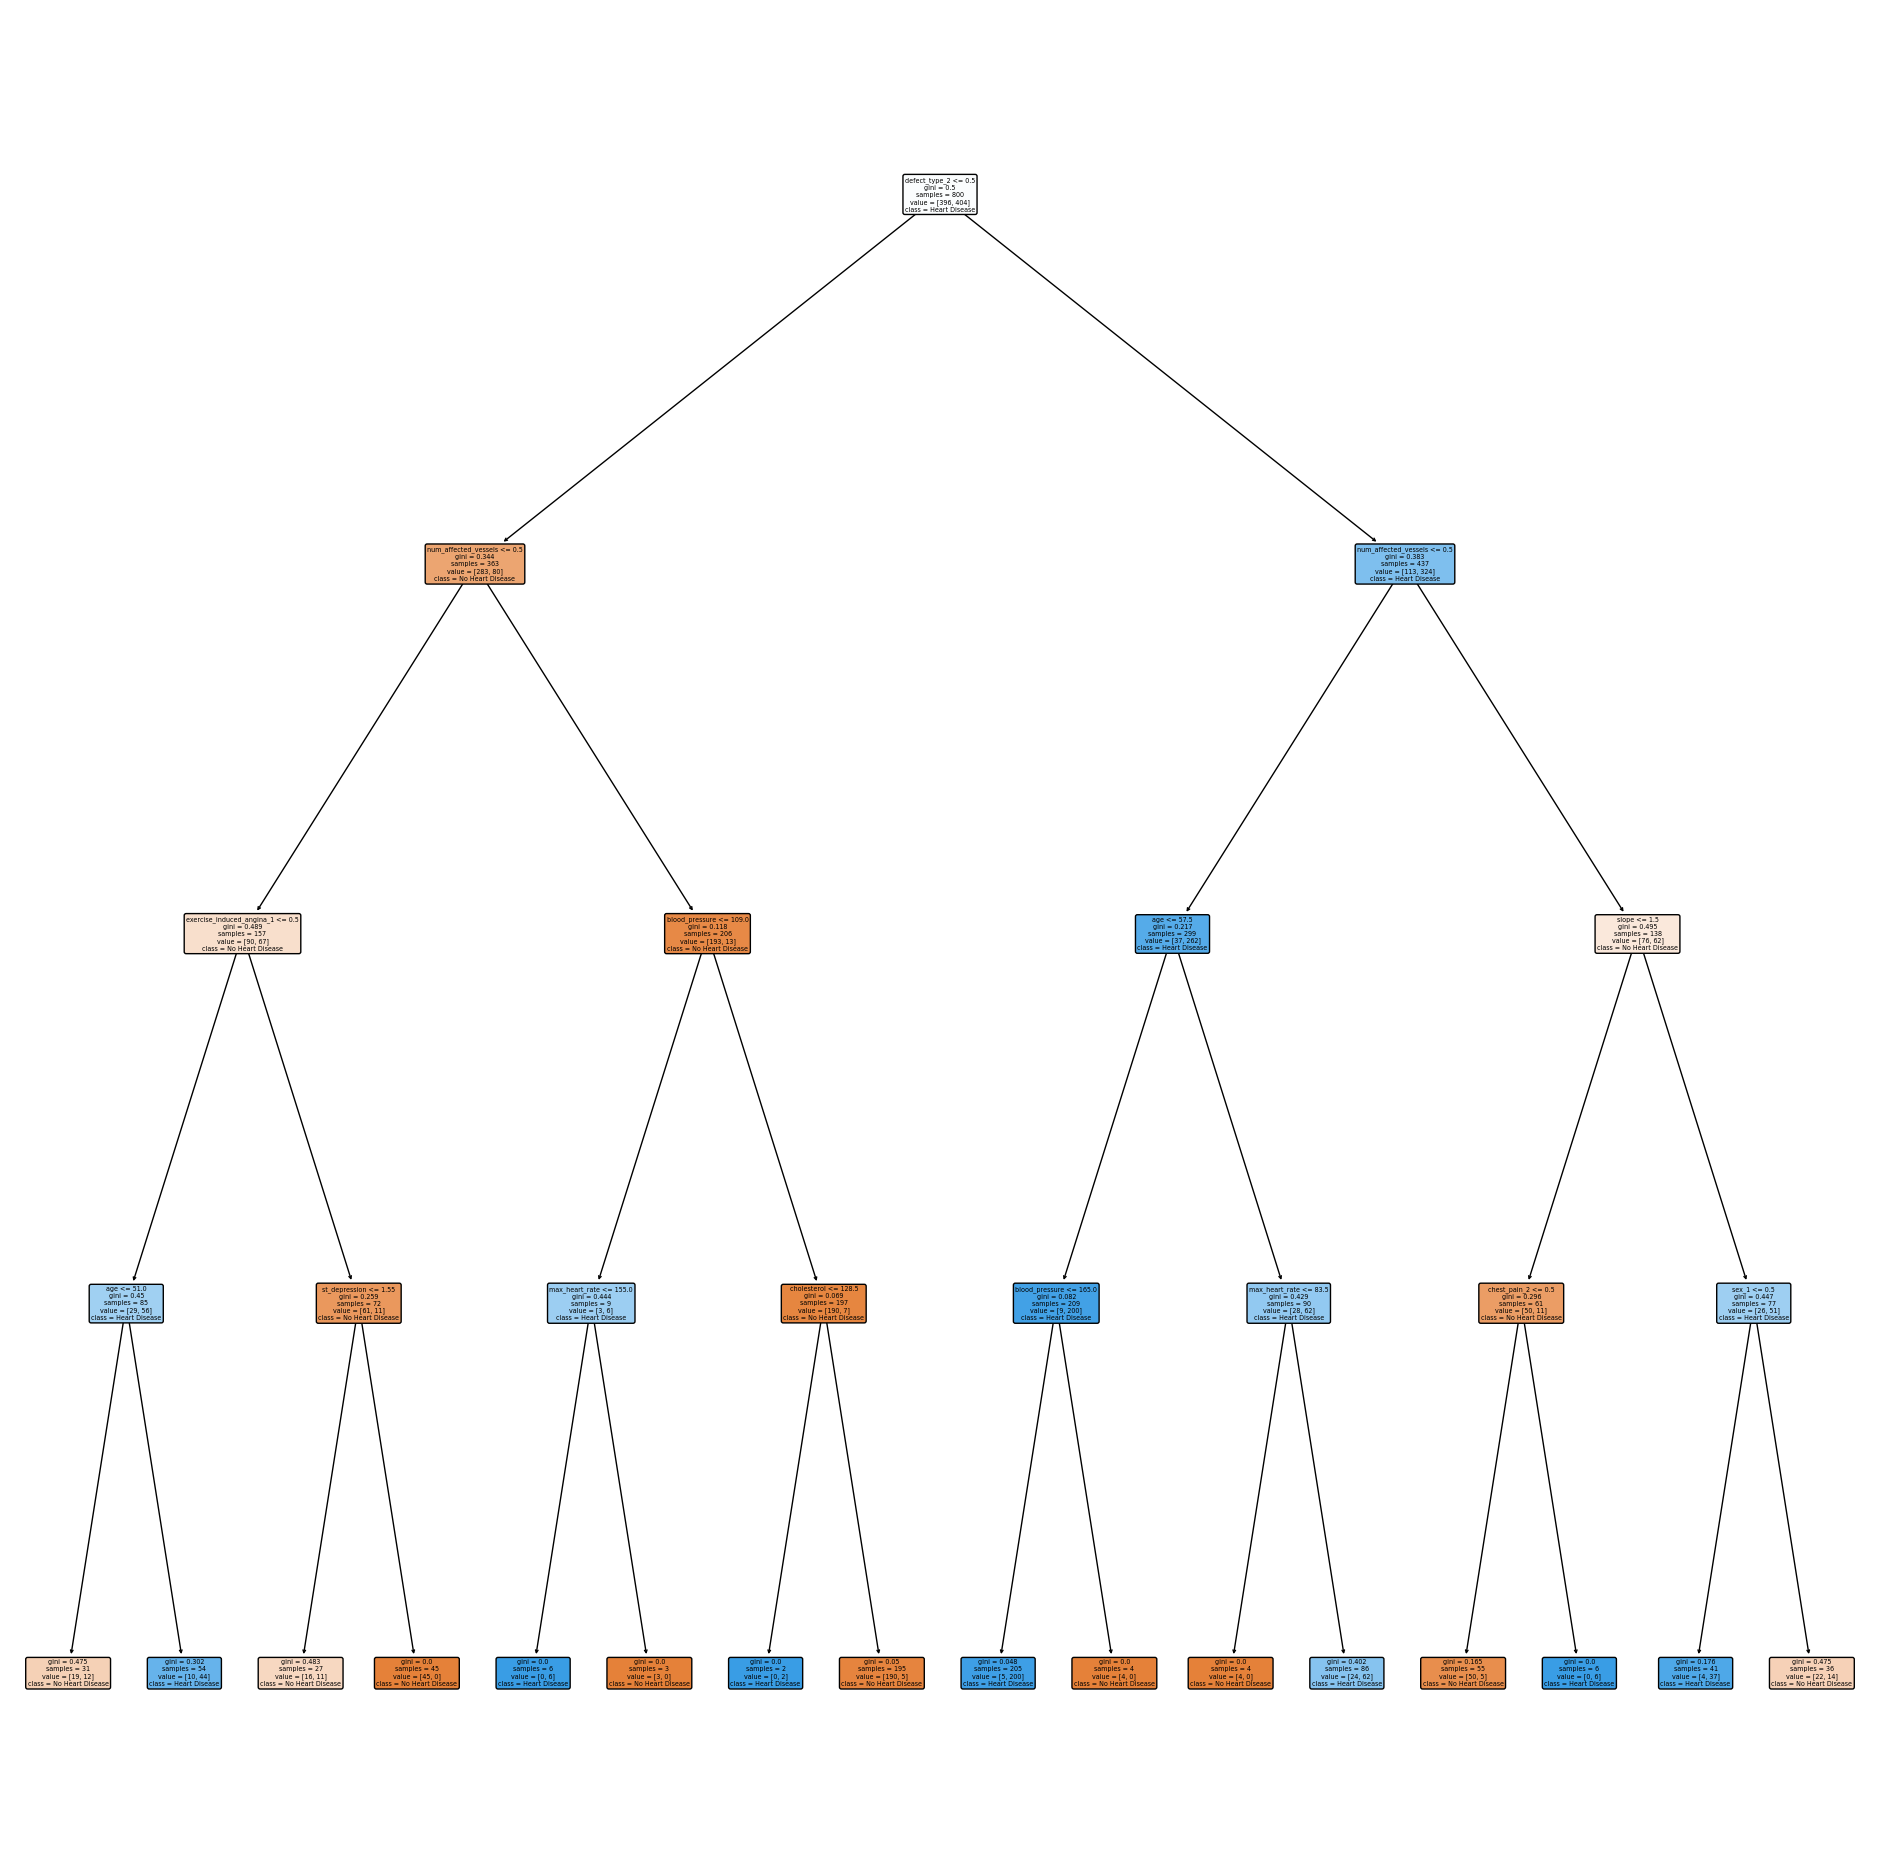

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)  
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["No Heart Disease","Heart Disease"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Test Data
Accuracy  :	 0.88

TPR Test :	 0.8365384615384616
TNR Test :	 0.9270833333333334

FPR Test :	 0.07291666666666667
FNR Test :	 0.16346153846153846


<Axes: >

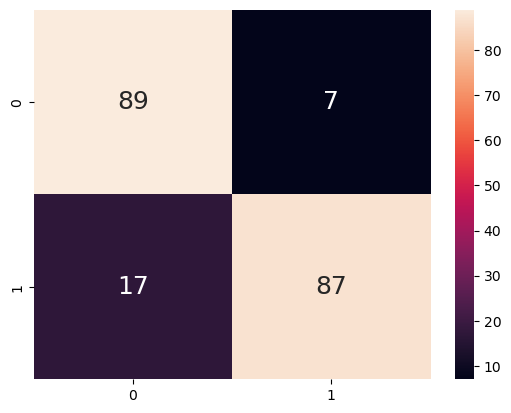

In [13]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})